<a href="https://colab.research.google.com/github/youming-qiu/BA888-Team3/blob/master/DS_Job_Market_Dataset_Cleaning_%2B_Basic_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

## Load the Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('alldata.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


## Data Cleaning Process

### Split the location by city and state 

In [0]:
new = df["location"].str.split(", ", n = 1, expand = True) 
df["city"] = new[0]
df["state"] = new[1]

# get rid of Zip code
state = df["state"].str.split(" ", n = 1, expand = True) 
df["state"] = state[0]
df = df.drop(['location'],axis = 1)

df.head()

,position,company,description,reviews,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA


### Categorize job positions into 5 main types

#### Data Scientist, Data Engineer, Data Analyst, Data Science Manager and Others

In [0]:
# classify job into "machine learning" , "data scientist", "data analyst", "data engineer", "others"
data=df.copy()

for i  in range(len(data)):
    p = data.iloc[i,0]
    p = str(p)
    p = p.lower()
    if  p.find("manager") != -1 or p.find("director") != -1 or p.find("consultant") != -1:
            data.loc[i,'position_type'] = 'Manager'
    elif p.find("scientist") != -1 or p.find("science") != -1 or p.find("data science")!= -1:
            data.loc[i,'position_type'] = 'Data Scientist'
    elif p.find("analyst") != -1 or p.find("analytics") != -1 or p.find("intelligent") != -1 or p.find("analysis") != -1 or p.find("statistician") != -1:
            data.loc[i,'position_type'] = 'Data Analyst'
    elif p.find("engineer") != -1 or p.find("machine")!= -1 or p.find("learning")!= -1 or p.find("programmer") != -1 or p.find("developer") != -1 or p.find("principal statistical programmer") != -1:
            data.loc[i,'position_type'] = 'Data Engineer'
    else:
        data.loc[i,'position_type'] = 'Others'
 
data.head()

,position,company,description,reviews,city,state,position_type
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,Atlanta,GA,Manager
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,Atlanta,GA,Data Scientist
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,Atlanta,GA,Data Scientist
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA,Data Analyst
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA,Data Engineer


In [0]:
data.groupby('position_type').count()

,position,company,description,reviews,city,state
position_type,,,,,,
Data Analyst,938,938,938,763,938,938
Data Engineer,1332,1332,1332,1013,1332,1332
Data Scientist,2693,2693,2693,1938,2693,2693
Manager,875,875,875,704,875,875
Others,1115,1115,1115,908,1115,1115


## Exploratory Data Analysis (EDA)

In [0]:
total_no_company=df['company'].nunique()
print('Toatl number of firms with data science job vacancies =',total_no_company)

Toatl number of firms with data science job vacancies = 2213


Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
1876                   Takeda Pharmaceutical        39
2040                University of Washington        39
928                                  Harnham        39
1421                                Oath Inc        34
1512        Pharmacyclics, an Ab

Text(0, 0.5, '# OF JOBS')

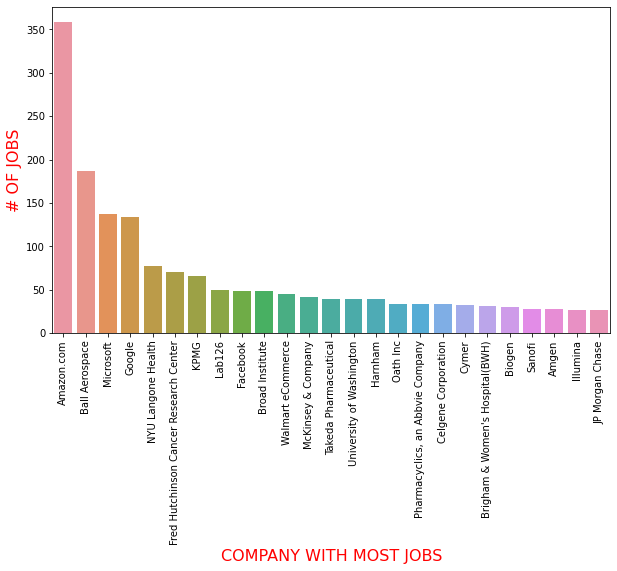

In [0]:
#finding highest number of vacancy in a company
most_vacancy= df.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(x="company", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

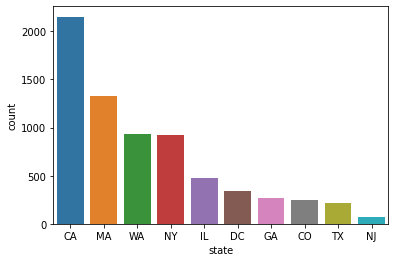

In [0]:
 sns.countplot(x="state", data=df,
                order = df['state'].value_counts().index)

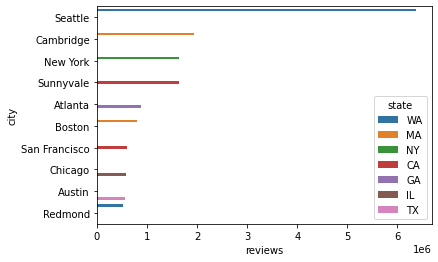

In [0]:
popularity_location = df.groupby(['state','city']).sum()
popularity_location = popularity_location.reset_index()
popularity_location = popularity_location.sort_values('reviews',ascending =False)

sns.barplot(y = 'city', x = 'reviews', data =popularity_location.head(10), hue = 'state' )

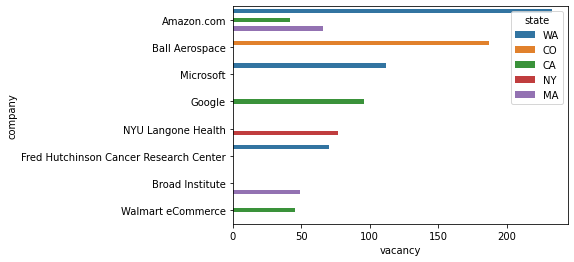

In [0]:
position_company = df.groupby(['state','company']).size().reset_index(name='vacancy').sort_values(['vacancy'],
                                                                                                       ascending =False)
position_company.head()

sns.barplot(x= 'vacancy', y='company',data =position_company.head(10), hue = 'state')

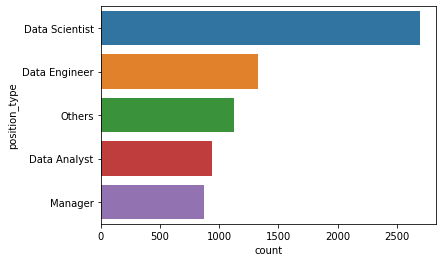

In [0]:
popular_position = data.groupby('position_type').size().sort_values(ascending =False).to_frame().reset_index()
popular_position.columns = ['position_type','count']
sns.barplot(x='count', y='position_type', data =popular_position.head(20))

## Wordcloud for 5 job position types


### Data Scientist

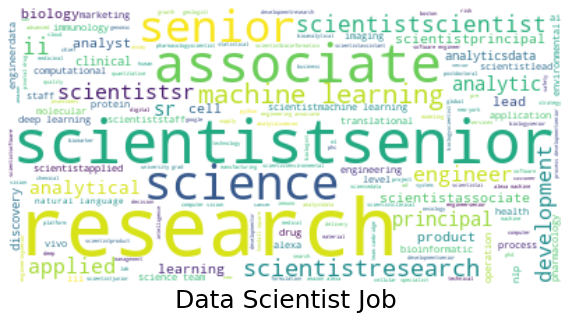

In [0]:
scientist_job  = data[data['position_type'] == 'Data Scientist']
scientist_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','scientist', 'scientistdata'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Scientist Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Analyst

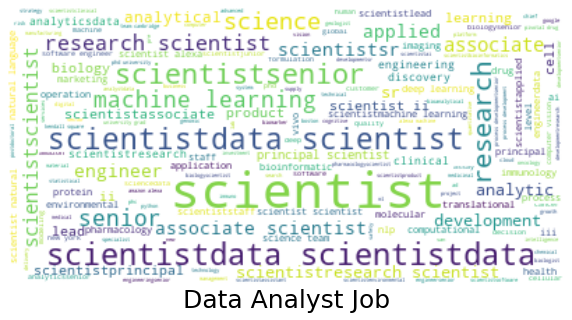

In [0]:
analyst_job = data[data['position_type'] == 'Data Analyst']
analyst_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','analyst'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Analyst Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Engineer

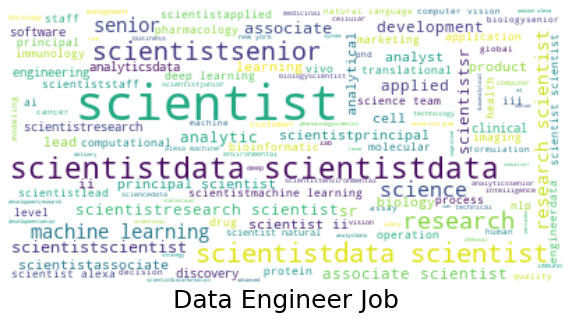

In [0]:
engineer_job  = data[data['position_type'] == 'Data Engineer']
engineer_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['data','engineer'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Manager

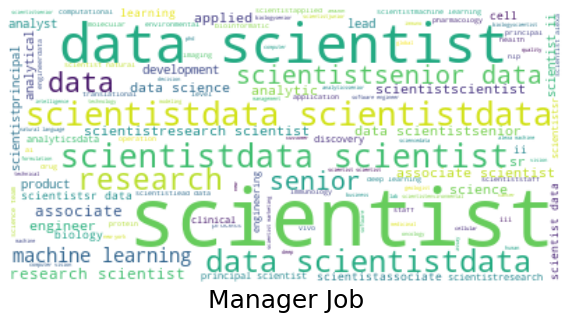

In [0]:
manager_job  = data[data['position_type'] == 'Manager']
manager_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['manager', 'director'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Manager Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Others

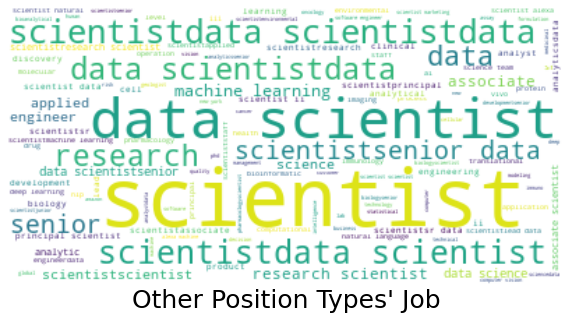

In [0]:
other_job  = data[data['position_type'] == 'Others']
other_job.head()

text = ''
for w in scientist_job['position'].str.lower():
    text = text + str(w)
stop_words = ['Others'] + list(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Other Position Types' Job", size = 25,y=-0.1)
plt.axis("off")
plt.show()

## Job Description Analysis

### Data Scientist

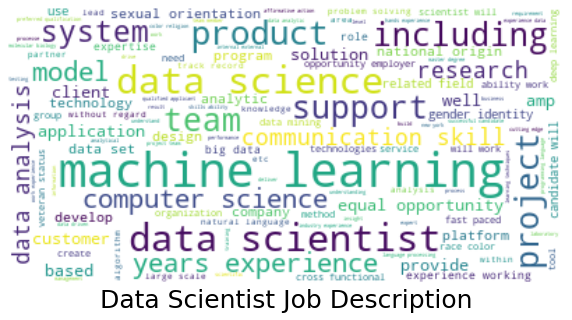

In [0]:
# scientist data job
text = ''
for w in scientist_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Scientist Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Analyst

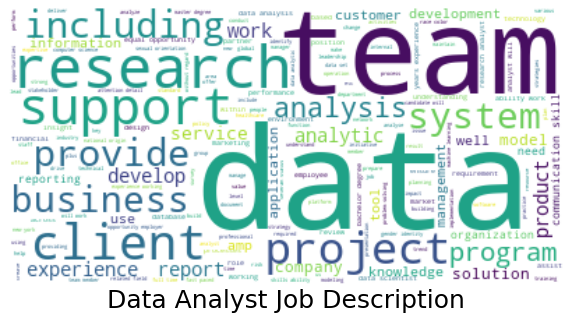

In [0]:
# data analyst job
text = ''
for w in analyst_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Analyst Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Data Engineer

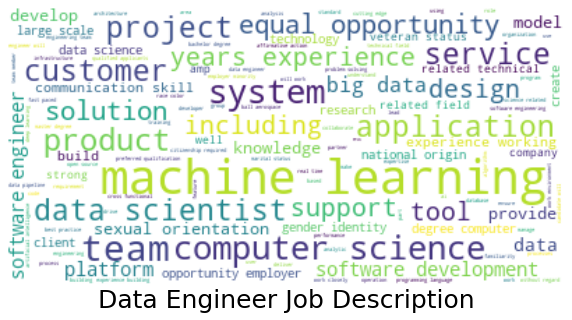

In [0]:
text = ''
for w in engineer_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Manager

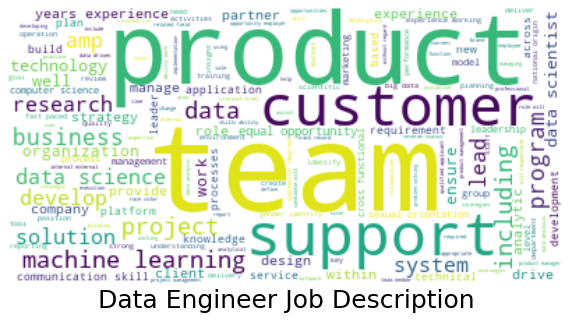

In [0]:
text = ''
for w in manager_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

### Other Job Types

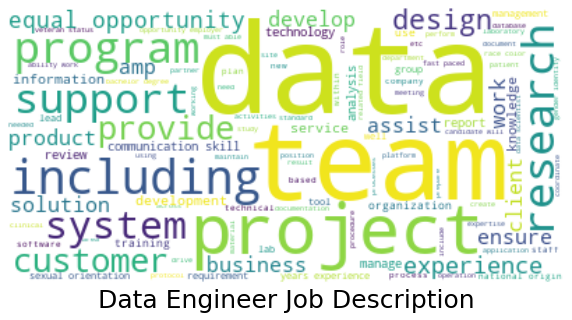

In [0]:
text = ''
for w in other_job ['description'].str.lower():
    text = text + str(w)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Engineer Job Description", size = 25,y=-0.1)
plt.axis("off")
plt.show()

## Technical Skills

### Data Scientist

In [0]:
for i  in range(len(scientist_job)):
  
    p = scientist_job.iloc[i,2]
    p =str(p)
    p = p.lower()
    if p.find("python")!= -1  :
        scientist_job.loc[i,'python'] = 1
    else:
        scientist_job.loc[i,'python'] = 0
    if p.find("r")!= -1  :
         scientist_job.loc[i,'r'] = 1
    else:
        scientist_job.loc[i,'r'] = 0
    if p.find("java")!= -1 or p.find("c++")!= -1 or p.find("c")!= -1  :
        scientist_job.loc[i,'java_c++'] = 1
    else:
        scientist_job.loc[i,'java_c++'] = 0

scientist_job[['python','r','java_c++']].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


python      0.537690
r           0.999629
java_c++    0.999629
dtype: float64

In [0]:
scientist_job.corr()

,reviews,python,r,java_c++
reviews,1.000000,-0.020155,-0.043250,-0.043250
python,-0.020155,1.000000,0.020786,0.020786
r,-0.043250,0.020786,1.000000,1.000000
java_c++,-0.043250,0.020786,1.000000,1.000000


### Data Analyst

In [0]:
for i  in range(len(analyst_job)):
    
    p = analyst_job.iloc[i,2]
    p =str(p)
    p = p.lower()
    if p.find("python")!= -1  :
        analyst_job.loc[i,'python'] = 1
    else:
        analyst_job.loc[i,'python'] = 0
    if p.find("r")!= -1  :
         analyst_job.loc[i,'r'] = 1
    else:
        analyst_job.loc[i,'r'] = 0
    if p.find("sql")!= -1   :
        analyst_job.loc[i,"sql"] = 1
    else:
        analyst_job.loc[i,"sql"] = 0
    if p.find("visualize")!= -1  or p.find("visualization")!= -1 or p.find("tableau")!= -1 or p.find("powerbi")!= -1:
        analyst_job.loc[i,"visualization"] = 1
    else:
        analyst_job.loc[i,"visualization"] = 0

analyst_job[['python','r',"sql","visualization"]].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


python           0.298507
r                1.000000
sql              0.353945
visualization    0.259062
dtype: float64

In [0]:
analyst_job.corr()

,reviews,python,r,sql,visualization
reviews,1.000000,-0.069269,NaN,0.053843,-0.218485
python,-0.069269,1.000000,NaN,0.525665,0.337469
r,NaN,NaN,NaN,NaN,NaN
sql,0.053843,0.525665,NaN,1.000000,0.427403
visualization,-0.218485,0.337469,NaN,0.427403,1.000000


### Data Engineer

In [0]:
for i  in range(len(engineer_job)):
    
    
    p = engineer_job.iloc[i,2]
    p =str(p)
    p = p.lower()
    if p.find("python")!= -1  :
        engineer_job.loc[i,'python'] = 1
    else:
        engineer_job.loc[i,'python'] = 0
    if p.find("r")!= -1  :
        engineer_job.loc[i,'r'] = 1
    else:
        engineer_job.loc[i,'r'] = 0
    if p.find("sql")!= -1   :
        engineer_job.loc[i,"sql"] = 1
    else:
        engineer_job.loc[i,"sql"] = 0
    if p.find("visualize")!= -1  or p.find("machine learning")!= -1:
        engineer_job.loc[i,"machine learning"] = 1
    else:
        engineer_job.loc[i,"machine learning"] = 0

engineer_job[['python','r',"sql","machine learning"]].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


python              0.545045
r                   1.000000
sql                 0.319820
machine learning    0.462462
dtype: float64

In [0]:
engineer_job.corr()

,reviews,python,r,sql,machine learning
reviews,1.000000,0.035860,NaN,-0.034340,0.033902
python,0.035860,1.000000,NaN,0.190103,0.260809
r,NaN,NaN,NaN,NaN,NaN
sql,-0.034340,0.190103,NaN,1.000000,0.035483
machine learning,0.033902,0.260809,NaN,0.035483,1.000000
